In [4]:
# Extarct dataset from Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:05<00:00, 123MB/s]
100% 1.06G/1.06G [00:05<00:00, 202MB/s]


In [6]:
# Unzip the dataset

import zipfile
zip = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip.extractall('/content')
zip.close()

In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [8]:
# will use generators to handle large dataset

train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize the values from 0 to 1 of image which is currently 0 to 255.

def map_image(image, label):
  image = tensorflow.cast(image/255, tensorflow.float32)
  return image, label

train_data = train_data.map(map_image)
validation_data  = validation_data.map(map_image)

In [10]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [11]:
# shape(32,256,256,3) - 32 is batch size, 256*256 image and 3 is for RGB channel.
for i in train_data:
  print(i)
  break

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[0.94509804, 0.9647059 , 0.9764706 ],
         [0.94509804, 0.9647059 , 0.9764706 ],
         [0.94509804, 0.9647059 , 0.9764706 ],
         ...,
         [0.8726226 , 0.9118383 , 0.9471324 ],
         [0.86832875, 0.90754443, 0.94283855],
         [0.8666667 , 0.90588236, 0.9411765 ]],

        [[0.9478324 , 0.96744025, 0.97920495],
         [0.9478324 , 0.96744025, 0.97920495],
         [0.9478324 , 0.96744025, 0.97920495],
         ...,
         [0.8755299 , 0.91474557, 0.9500397 ],
         [0.8710631 , 0.9102788 , 0.9455729 ],
         [0.86940104, 0.9086167 , 0.94391084]],

        [[0.94965535, 0.9692632 , 0.9810279 ],
         [0.94965535, 0.9692632 , 0.9810279 ],
         [0.94965535, 0.9692632 , 0.9810279 ],
         ...,
         [0.88116574, 0.9197457 , 0.9550398 ],
         [0.8774433 , 0.9160233 , 0.9513174 ],
         [0.87578124, 0.91436124, 0.94965535]],

        ...,

        [[0.9984405 , 0.99059737

CNN Model

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [14]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
logs = model.fit(train_data, epochs=20, validation_data = validation_data)

Epoch 1/20
625/625 [==============================] - 66s 90ms/step - loss: 0.6245 - accuracy: 0.6399 - val_loss: 0.5326 - val_accuracy: 0.7378
Epoch 2/20
625/625 [==============================] - 59s 94ms/step - loss: 0.5013 - accuracy: 0.7527 - val_loss: 0.4853 - val_accuracy: 0.7664
Epoch 3/20
625/625 [==============================] - 56s 90ms/step - loss: 0.4003 - accuracy: 0.8159 - val_loss: 0.5046 - val_accuracy: 0.7732
Epoch 4/20
625/625 [==============================] - 57s 90ms/step - loss: 0.2730 - accuracy: 0.8830 - val_loss: 0.6882 - val_accuracy: 0.7878
Epoch 5/20
625/625 [==============================] - 58s 92ms/step - loss: 0.1551 - accuracy: 0.9409 - val_loss: 0.8100 - val_accuracy: 0.7732
Epoch 6/20
625/625 [==============================] - 57s 90ms/step - loss: 0.0843 - accuracy: 0.9690 - val_loss: 1.1609 - val_accuracy: 0.7674
Epoch 7/20
625/625 [==============================] - 75s 119ms/step - loss: 0.0635 - accuracy: 0.9786 - val_loss: 1.0510 - val_accuracy

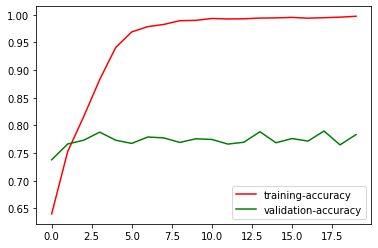

In [16]:
# Plot loss and accuracy graphs

import matplotlib.pyplot as plt

plt.plot(logs.history['accuracy'], color='red', label='training-accuracy')
plt.plot(logs.history['val_accuracy'], color='green', label='validation-accuracy')
plt.legend()
plt.show()

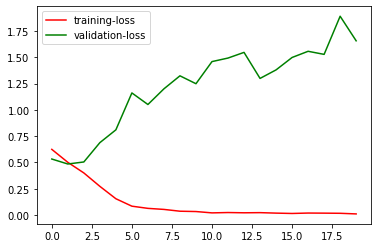

In [17]:
# We can see there is Overfiiting in this.

plt.plot(logs.history['loss'], color='red', label='training-loss')
plt.plot(logs.history['val_loss'], color='green', label='validation-loss')
plt.legend()
plt.show()